In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 第一部分：Newton法和弦截法

In [2]:
def direct_iterations(φ, x0, N):
    x_list = np.zeros(N)
    x_list[0] = x0
    for j in range(1,N):
        x_list[j] = φ(x_list[j-1])
    return x_list

def newton_iterations(f, fderi, x0, N):
    x_list = np.zeros(N)
    x_list[0] = x0
    for j in range(1,N):
        x0_tmp = x_list[j-1]
        x_list[j] = x0_tmp - f(x0_tmp)/fderi(x0_tmp)
    return x_list

def secant_iterations(f, x0, x1, N):
    x_list = np.zeros(N)
    x_list[0] = x0
    x_list[1] = x1
    for j in range(2,N):
        x0_tmp = x_list[j-2]
        x1_tmp = x_list[j-1]
        x_list[j] = x1_tmp - f(x1_tmp)*(x1_tmp - x0_tmp)/(f(x1_tmp) - f(x0_tmp))
    return x_list

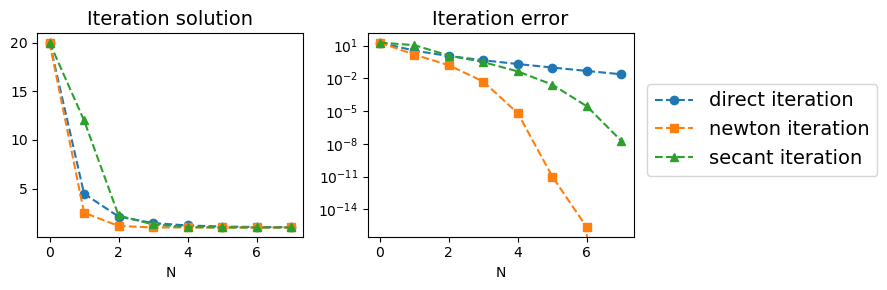

In [3]:
N = 8

c = 2
φ = lambda x : np.abs(x)**(1/c)
f = lambda x : np.abs(x)**(1/c) - x
fderi = lambda x : np.sign(x)/c/np.abs(x)**(1-1/c) - 1

x0 = 20
x1 = 12

y_list_iter = direct_iterations(φ,x0,N)
y_list_newton = newton_iterations(f,fderi,x0,N)
y_list_secant = secant_iterations(f,x0,x1,N)

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(y_list_iter,'o--', label="direct iteration")
plt.plot(y_list_newton,'s--', label="newton iteration")
plt.plot(y_list_secant,'^--', label="secant iteration")
plt.title("Iteration solution", fontsize=14)
plt.xlabel("N")
plt.subplot(1,2,2)
plt.plot(np.abs(y_list_iter-1), 'o--', label="direct iteration")
plt.plot(np.abs(y_list_newton-1), 's--', label="newton iteration")
plt.plot(np.abs(y_list_secant-1), '^--', label="secant iteration")
plt.legend(fontsize=14, loc=(1.05,0.3))
plt.yscale("log")
plt.title("Iteration error", fontsize=14)
plt.xlabel("N")
plt.tight_layout()

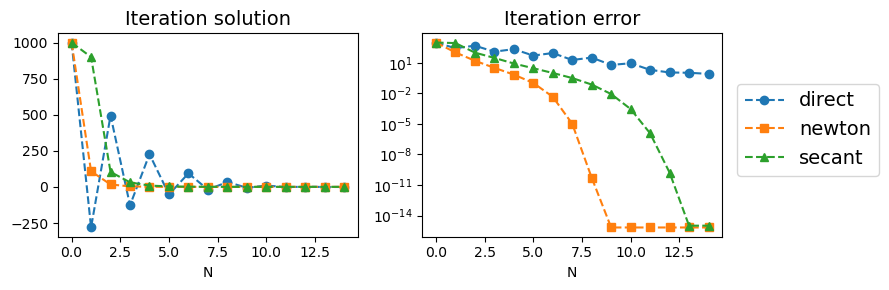

In [4]:
c = 1.05
φ = lambda x : np.abs(x)**(1/c)
f = lambda x : np.abs(x)**(1/c) - x
fderi = lambda x : np.sign(x)/c/np.abs(x)**(1-1/c) - 1

N = 15
x0 = 1000
x1 = 900

y_list_iter = direct_iterations(f,x0,N)
y_list_newton = newton_iterations(f,fderi,x0,N)
y_list_secant = secant_iterations(f,x0,x1,N)

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(y_list_iter,'o--', label="direct")
plt.plot(y_list_newton,'s--', label="newton")
plt.plot(y_list_secant,'^--', label="secant")
plt.title("Iteration solution", fontsize=14)
plt.xlabel("N")
plt.subplot(1,2,2)
plt.plot(np.abs(y_list_iter-1), 'o--', label="direct")
plt.plot(np.abs(y_list_newton-1), 's--', label="newton")
plt.plot(np.abs(y_list_secant-1), '^--', label="secant")
plt.legend(fontsize=14, loc=(1.05,0.3))
plt.yscale("log")
plt.title("Iteration error", fontsize=14)
plt.xlabel("N")

plt.tight_layout()

Newton's method
Empirical slope = 0.7429
Slope (theory)  = 0.6931

R = 0.9999


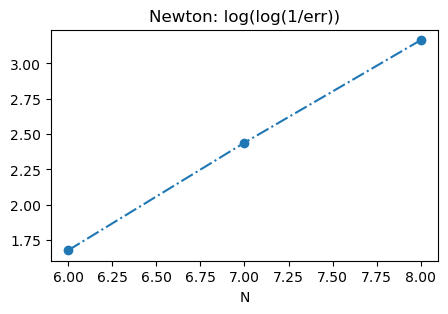

In [5]:
idx_range_newton = np.array(np.arange(6,9))

slope1, _,r1,_,_ = linregress(idx_range_newton, np.log(np.log(1/np.abs(y_list_newton[idx_range_newton]-1))))
print("Newton's method")
print("Empirical slope = {:.4f}".format(slope1))
print("Slope (theory)  = {:.4f}".format(np.log(2)))
print()
print("R = {:.4f}".format(r1))

plt.figure(figsize=(5,3))
plt.plot(idx_range_newton, np.log(np.log(1/np.abs(y_list_newton[idx_range_newton]-1))), 'o-.')
plt.title('Newton: log(log(1/err))')
plt.xlabel("N")
plt.show()

Secant method
Empirical slope = 0.5521
Slope (theory)  = 0.4812

R = 0.9993


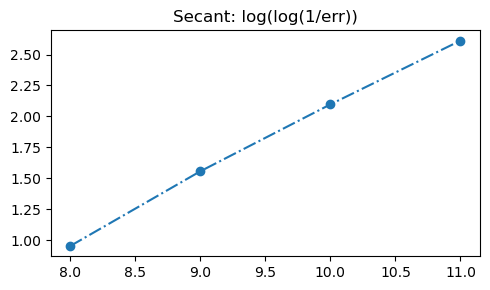

In [6]:
idx_range_secant = range(8,12)

slope2, _,r2,_,_ = linregress(idx_range_secant, np.log(np.log(1/np.abs(y_list_secant[idx_range_secant]-1))))
print("Secant method")
print("Empirical slope = {:.4f}".format(slope2))
print("Slope (theory)  = {:.4f}".format(np.log(1.618)))
print()
print("R = {:.4f}".format(r2))

plt.figure(figsize=(5,3))
plt.plot(idx_range_secant, np.log(np.log(1/np.abs(y_list_secant[idx_range_secant]-1))),'o-.')
plt.title('Secant: log(log(1/err))')
plt.tight_layout()

plt.show()

 # 第2部分：牛顿下山法

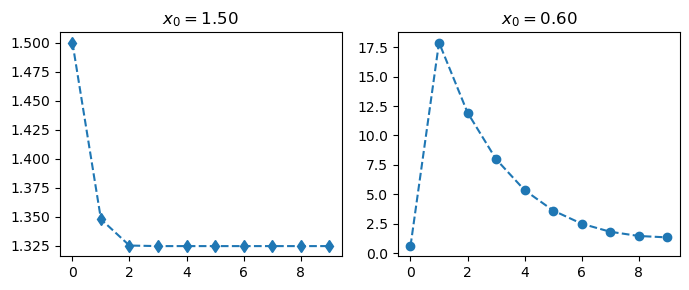

In [7]:
f = lambda x : x**3 - x - 1
fderi = lambda x : 3*x**2 - 1

# 近似的真实值是 1.324717957（10位有效数字）
N = 10

plt.figure(figsize=(7,3))

x0 = 1.5
plt.subplot(1,2,1)
plt.plot(newton_iterations(f, fderi, x0, N), 'd--')
plt.title(r"$x_0 = {:.2f}$".format(x0))
x0 = 0.6
iter_soln = newton_iterations(f, fderi, x0, N)
plt.subplot(1,2,2)
plt.plot(iter_soln, 'o--')
plt.title(r"$x_0 = {:.2f}$".format(x0))
plt.tight_layout()

In [8]:
print("x_0 = {:4.2f} f(x_0) = {:4.2f}".format(x0, f(x0)))
print("x_1 = {:4.2f} f(x_1) = {:4.2f}".format(iter_soln[1], f(iter_soln[1])))

x_0 = 0.60 f(x_0) = -1.38
x_1 = 17.90 f(x_1) = 5716.44


In [9]:
def newton_downhill_iterations(f, fderi, x0_guess, N, M=10):
    """
        牛顿下山法
    """
    x_list = [None] * N
    x_list[0] = x0_guess
    search_num_list = np.zeros(N)
    
    for j in range(1,N):
        λ = 1.0
        search_num = 0
        while search_num < M:
            x0 = x_list[j-1]
            x1 = x0 - f(x0)/fderi(x0)
            x_new = λ*x1 + (1-λ)*x0
            if np.abs(f(x_new)) < np.abs(f(x0)):
                x_list[j] = x_new
                break
            else:
               λ /= 2
               search_num += 1

        if search_num == M:
            search_num_list[j] = None
            break
        else:
            search_num_list[j] = search_num

    return x_list

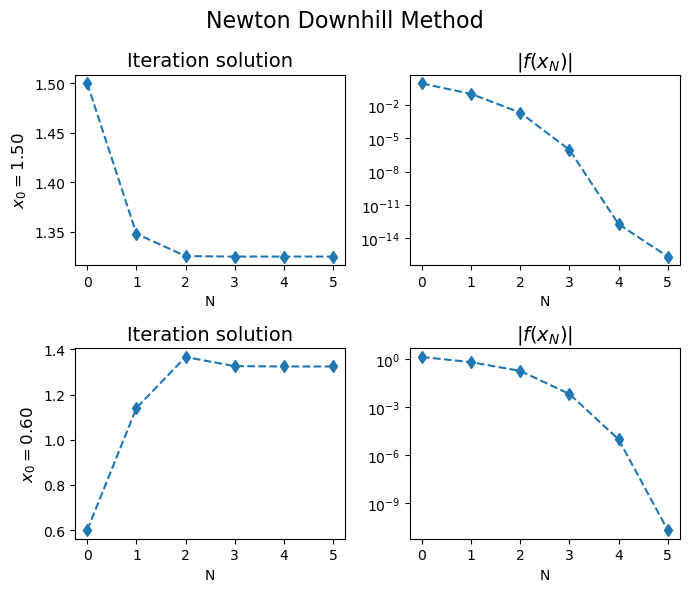

In [10]:
N = 6

x0 = 1.5
iter_soln = newton_downhill_iterations(f, fderi, x0, N)

plt.figure(figsize=(7,6))
plt.subplot(2,2,1)
plt.plot(iter_soln, 'd--')
plt.title("Iteration solution",fontsize=14)
plt.ylabel(r"$x_0 = ${:.2f}".format(x0),fontsize=12)
plt.xlabel("N")

plt.subplot(2,2,2)
plt.plot([np.abs(f(item)) for item in iter_soln], 'd--')
plt.title(r"$|f(x_N)|$",fontsize=14)
plt.yscale('log')
plt.xlabel("N")

x0 = 0.6
iter_soln_2 = newton_downhill_iterations(f, fderi, x0, N)

plt.subplot(2,2,3)
plt.plot(iter_soln_2, 'd--')
plt.title("Iteration solution",fontsize=14)
plt.ylabel(r"$x_0 = ${:.2f}".format(x0),fontsize=12)
plt.xlabel("N")
plt.subplot(2,2,4)
plt.plot([np.abs(f(item)) for item in iter_soln_2], 'd--')
plt.title(r"$|f(x_N)|$",fontsize=14)
plt.yscale('log')
plt.xlabel("N")
plt.suptitle("Newton Downhill Method",fontsize=16)
plt.tight_layout()
